In [24]:
!pip install prophet

In [25]:
!pip install cmdstanpy==1.3.0

Notebook 6: Time-Series Forecasting Model
* Goal: Build a "robust model" to forecast future global uranium demand.

Block 1: Imports

First, we need to import pandas for data manipulation and Prophet for our forecasting model. We'll also import json to save our trained model.

In [26]:
import pandas as pd
from prophet import Prophet
from prophet.serialize import model_to_json
import json

print("Imported Prophet, pandas, and json.")

Imported Prophet, pandas, and json.


Block 2: Load and Prepare Data for Prophet

Prophet requires a DataFrame with two specific column names: ds (for the date) and y (for the value). We'll load our global_demand_ts.csv, filter it, and rename the columns.

In [27]:
# Load the global demand data
df_global = pd.read_csv('global_demand_ts.csv')

# 1. Filter out the "Year 0" data
df_global_filtered = df_global[df_global['Year'] > 1950].copy()

# 2. Rename columns to 'ds' and 'y'
df_prophet = df_global_filtered.rename(
    columns={
        'Year': 'ds',
        'Total Thermal Capacity, MWt': 'y'
    }
)

# 3. Convert 'ds' (which is just a year) to a YYYY-MM-DD date format
# Prophet works best with full dates. We'll use Jan 1st for each year.
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')

print("Data loaded and prepared for Prophet (ds, y format).")
print(df_prophet.head())

Data loaded and prepared for Prophet (ds, y format).
          ds      y
0 1969-01-01   4755
1 1970-01-01  11851
2 1971-01-01  17942
3 1972-01-01  32262
4 1973-01-01  50505


Block 3: Initialize and Train the Model

Now we'll initialize the Prophet model. We'll include yearly_seasonality as it's likely relevant to multi-year cycles.

In [28]:
# Initialize the model
# We set yearly_seasonality=True, but Prophet may not find one
# if the data is only yearly. It's good practice.
# Removed stan_backend=None to allow Prophet to use its default backend initialization.
model = Prophet(yearly_seasonality=True)

# Fit the model to our prepared data
model.fit(df_prophet)

print("Prophet model has been trained on the data.")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Prophet model has been trained on the data.


Block 4: Generate Future Forecast

With the model trained, we'll ask it to predict the next 20 years.

In [29]:
# 1. Create a DataFrame for future predictions (20 years)
# 'freq='Y'' ensures we get one prediction per year
future = model.make_future_dataframe(periods=20, freq='Y')

# 2. Make the prediction
# The 'forecast' DataFrame contains the original 'y' values and the predicted 'yhat' values
forecast = model.predict(future)

print("Future forecast generated for the next 20 years.")

# 3. Save the forecast data to a CSV for later use
forecast.to_csv('forecast_data.csv', index=False)
print("Saved forecast data to 'forecast_data.csv'.")

Future forecast generated for the next 20 years.
Saved forecast data to 'forecast_data.csv'.


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


Block 5: Plot the Forecast

Prophet has built-in plotting functions that make it easy to visualize the forecast.

Generating forecast plots...


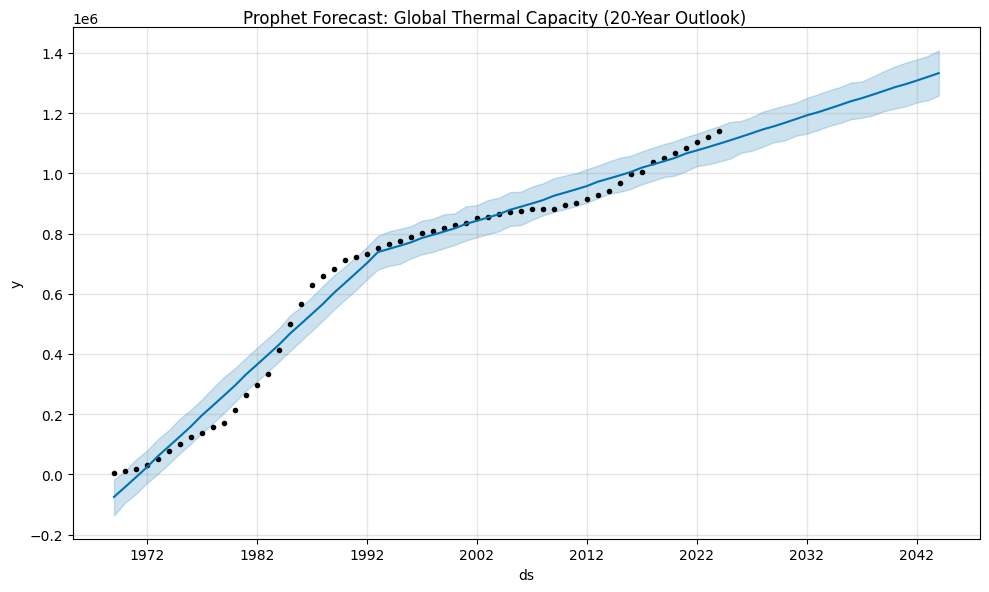

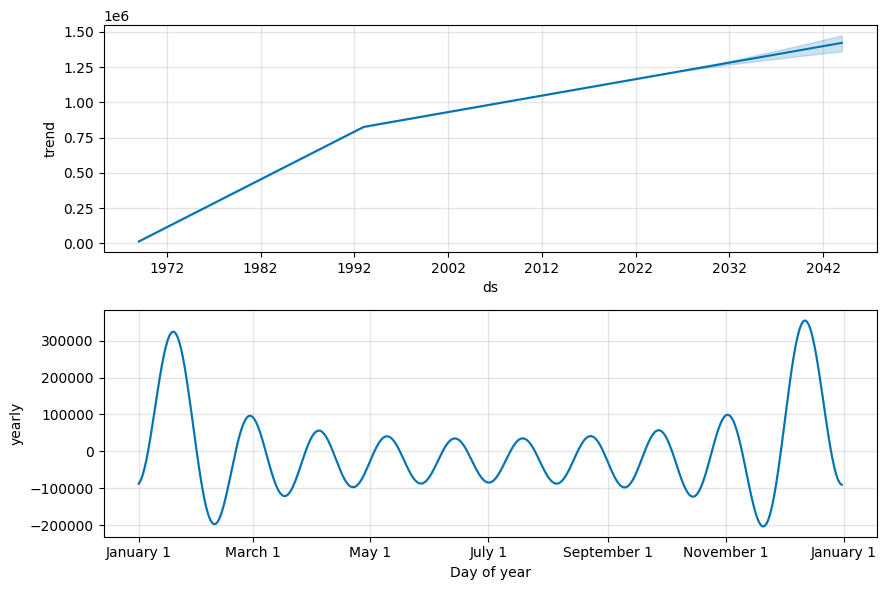

In [30]:
print("Generating forecast plots...")

# 1. Plot the main forecast
# This shows the original data (black dots), the model's fit (blue line),
# and the forecasted values with uncertainty (light blue area).
fig1 = model.plot(forecast)
# Add title
fig1.suptitle('Prophet Forecast: Global Thermal Capacity (20-Year Outlook)')
fig1.show()

# 2. Plot the trend components
# This shows the underlying trend and any yearly seasonality.
fig2 = model.plot_components(forecast)
fig2.show()

Block 6: Save the Model

Finally, we'll save the trained model to a JSON file so we can load it in our dashboard without retraining.

In [31]:
# Save the model to a json file
model_file = 'prophet_model.json'
with open(model_file, 'w') as f:
    json.dump(model_to_json(model), f)

print(f"Trained Prophet model saved to '{model_file}'.")
print("\n--- Notebook 6 complete. ---")

Trained Prophet model saved to 'prophet_model.json'.

--- Notebook 6 complete. ---
